In [208]:
import requests
from pprint import pprint
import pandas as pd
import json
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress
import random


%matplotlib inline


In [209]:
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)


len(cities)

629

In [210]:
city_names=[]
lats=[]
longs=[]
max_temps=[]
humidities=[]
clouds=[]
wind_speeds=[]
country=[]
date=[]
countries=[]
dates=[]

city_number=1

for city in cities:
    url="http://api.openweathermap.org/data/2.5/weather?q={}&appid=54302faa5d1cebad17c99df3e66fa783".format(city)
    res=requests.get(url)
    data=res.json()
    
    if "cod" in data and data["cod"] == "404":
        print("City not found. Skipping...")
    else:
        city_names.append(data["name"])
        lats.append(data["coord"]["lat"])
        longs.append(data["coord"]["lon"])
        max_temps.append(data["main"]["temp_max"])
        humidities.append(data["main"]["humidity"])
        clouds.append(data["clouds"]["all"])
        wind_speeds.append(data["wind"]["speed"])
        countries.append(data["sys"]["country"])
        dates.append(data["dt"])
        c_id.append(data["id"])
        print("Processing Record "+str(city_number)+" for "+data["name"])
        city_number=city_number+1
    
    

       

Processing Record 1 for Kapchorwa
Processing Record 2 for Punta Arenas
Processing Record 3 for Mataura
City not found. Skipping...
Processing Record 4 for Rikitea
Processing Record 5 for Chicama
Processing Record 6 for Chintamani
Processing Record 7 for Neuquén
Processing Record 8 for Dingle
Processing Record 9 for Taksimo
Processing Record 10 for Green River
Processing Record 11 for Port-Cartier
Processing Record 12 for Kalmar
Processing Record 13 for Lavrentiya
Processing Record 14 for Vaini
Processing Record 15 for Ushuaia
Processing Record 16 for Thompson
Processing Record 17 for Bambous Virieux
Processing Record 18 for Kuril'sk
Processing Record 19 for Atuona
Processing Record 20 for Arys
City not found. Skipping...
Processing Record 21 for Jamestown
Processing Record 22 for Codroipo
Processing Record 23 for Hilo
Processing Record 24 for Barrow
Processing Record 25 for Bluff
Processing Record 26 for Berlevåg
City not found. Skipping...
City not found. Skipping...
City not found. S

Processing Record 220 for Korla
Processing Record 221 for Kalmunai
City not found. Skipping...
Processing Record 222 for São Geraldo do Araguaia
Processing Record 223 for Richards Bay
Processing Record 224 for Kingman
Processing Record 225 for Hong Kong
Processing Record 226 for Port Elizabeth
City not found. Skipping...
Processing Record 227 for Grindavik
Processing Record 228 for São João da Barra
Processing Record 229 for Novobirilyussy
Processing Record 230 for East London
Processing Record 231 for ‘Āhuimanu
Processing Record 232 for Puqi
Processing Record 233 for San Patricio
Processing Record 234 for Muros
Processing Record 235 for Leshan
Processing Record 236 for Belmonte
Processing Record 237 for Yangi Marg`ilon
Processing Record 238 for Soria
Processing Record 239 for Mossamedes
Processing Record 240 for Heihe
Processing Record 241 for Carinhanha
City not found. Skipping...
Processing Record 242 for Lagoa
Processing Record 243 for Guerrero Negro
Processing Record 244 for Batag

Processing Record 431 for Chumikan
Processing Record 432 for Inhambane
Processing Record 433 for Strezhevoy
Processing Record 434 for Rocha
Processing Record 435 for Zemio
Processing Record 436 for Shimanovsk
City not found. Skipping...
Processing Record 437 for Tual
Processing Record 438 for Saint Anthony
Processing Record 439 for Klaksvík
Processing Record 440 for Port Lincoln
Processing Record 441 for Miguel Calmon
Processing Record 442 for Columbus
Processing Record 443 for Boffa
Processing Record 444 for Andros Town
Processing Record 445 for Painesville
Processing Record 446 for Ibrā’
Processing Record 447 for Londrina
Processing Record 448 for Defiance
Processing Record 449 for Krk
Processing Record 450 for Shimoda
Processing Record 451 for Mogzon
Processing Record 452 for Mnogovershinnyy
Processing Record 453 for Tabacao
Processing Record 454 for Atasū
Processing Record 455 for Niterói
Processing Record 456 for Shubarkuduk
Processing Record 457 for Talnakh
Processing Record 458 

In [211]:
curr_weather_df=pd.DataFrame({
        "City_Name":city_names,
        "Latitude":lats,
        "Longtitude":longs,
        "Max. Temperature":max_temps,
        "Humidity":humidities,
        "Cloudiness":clouds,
        "Wind_Speed":wind_speeds,
        "Country":countries,
        "Date":dates})
curr_weather_df

,City_Name,Latitude,Longtitude,Max. Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kapchorwa,1.40,34.45,288.21,67,0,1.94,UG,1608515852
1,Punta Arenas,-53.15,-70.92,281.15,65,77,8.20,CL,1608515708
2,Mataura,-46.19,168.86,287.59,83,100,3.13,NZ,1608515699
3,Rikitea,-23.12,-134.97,297.86,77,3,9.36,PF,1608515696
4,Chicama,-7.84,-79.15,292.15,88,20,4.10,PE,1608515768
...,...,...,...,...,...,...,...,...,...
571,Neyshabur,36.21,58.80,274.06,83,55,0.50,IR,1608515927
572,Brigham City,41.51,-112.02,275.37,80,90,1.50,US,1608515659
573,Krasnorechenskiy,44.63,135.35,262.07,90,73,3.17,RU,1608515927
574,Mabaruma,8.20,-59.78,295.92,98,30,1.18,GY,1608515927


In [212]:
curr_weather_df["Date"].dtypes

dtype('int64')

In [213]:
converted_to_fahrenaty=(curr_weather_df["Max. Temperature"]*(9/5))-459.67
curr_weather_df["Max. Temperature"]=converted_to_fahrenaty
curr_weather_df

,City_Name,Latitude,Longtitude,Max. Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kapchorwa,1.40,34.45,59.108,67,0,1.94,UG,1608515852
1,Punta Arenas,-53.15,-70.92,46.400,65,77,8.20,CL,1608515708
2,Mataura,-46.19,168.86,57.992,83,100,3.13,NZ,1608515699
3,Rikitea,-23.12,-134.97,76.478,77,3,9.36,PF,1608515696
4,Chicama,-7.84,-79.15,66.200,88,20,4.10,PE,1608515768
...,...,...,...,...,...,...,...,...,...
571,Neyshabur,36.21,58.80,33.638,83,55,0.50,IR,1608515927
572,Brigham City,41.51,-112.02,35.996,80,90,1.50,US,1608515659
573,Krasnorechenskiy,44.63,135.35,12.056,90,73,3.17,RU,1608515927
574,Mabaruma,8.20,-59.78,72.986,98,30,1.18,GY,1608515927


#### Creating .csv output

In [214]:
curr_weather_df.to_csv("Output/output.csv",encoding="utf-8",index=False,header=True)

#### Plotting Scatter: Temperature (F) vs. Latitude

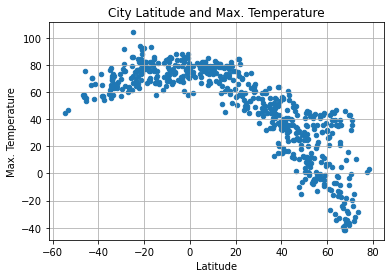

In [242]:
df_temp_lat=curr_weather_df[["Max. Temperature","Latitude"]]

df_temp_lat.plot.scatter(x="Latitude",y="Max. Temperature",alpha=1,marker='o')
plt.title("City Latitude and Max. Temperature")
plt.grid()


plt.savefig('latitude_temperature.png')

#### Plotting Scatter: Humidity vs. Latitude

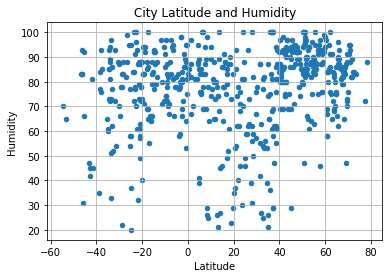

In [243]:
df_hum_lat=curr_weather_df[["Humidity","Latitude"]]
df_hum_lat.plot.scatter(x="Latitude",y="Humidity",alpha=1,marker='o')
plt.title("City Latitude and Humidity")
plt.grid()


plt.savefig('latitude_humidity.png')

#### Plotting Scatter:Cloudiness vs. Latitude

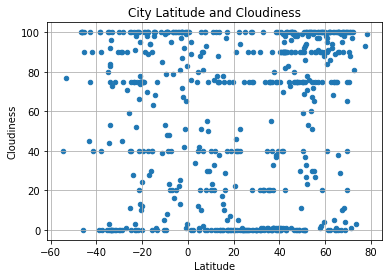

In [244]:
df_cloud_lat=curr_weather_df[["Cloudiness","Latitude"]]
df_cloud_lat.plot.scatter(x="Latitude",y="Cloudiness",alpha=1,marker='o')
plt.title("City Latitude and Cloudiness")
plt.grid()


plt.savefig('latitude_cloudiness.png')

#### Plotting Scatter:Wind Speed vs. Latitude

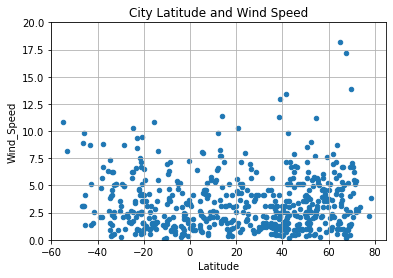

In [245]:
df_wind_lat=curr_weather_df[["Wind_Speed","Latitude"]]
df_wind_lat.plot.scatter(x="Latitude",y="Wind_Speed",alpha=1,marker='o')
plt.title("City Latitude and Wind Speed")
plt.grid()

plt.ylim(0, 20)
plt.xlim(-60, 85)


plt.savefig('latitude_windspeed')

## Linear Regression

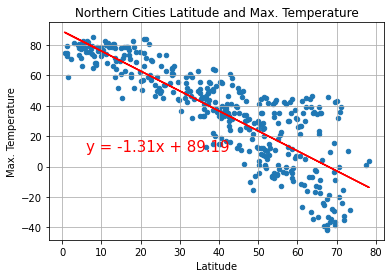

In [246]:
df_northern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]>=0,["Latitude","Max. Temperature"]]

latitude=df_northern_hemisphere["Latitude"]
temperature=df_northern_hemisphere["Max. Temperature"]

df_northern_hemisphere.plot.scatter(x="Latitude",y="Max. Temperature",alpha=1,marker='o')
plt.title("Northern Cities Latitude and Max. Temperature")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_northern_latitude_temperature.png')

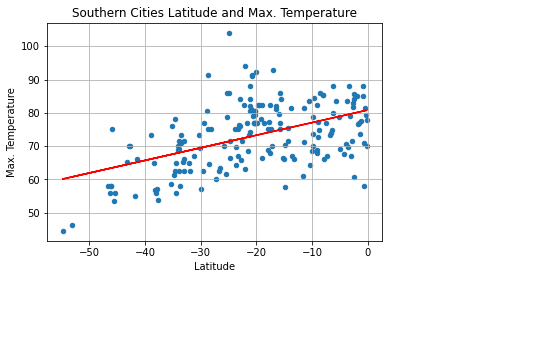

In [249]:
df_southern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]<0,["Latitude","Max. Temperature"]]

latitude=df_southern_hemisphere["Latitude"]
temperature=df_southern_hemisphere["Max. Temperature"]

df_southern_hemisphere.plot.scatter(x="Latitude",y="Max. Temperature",alpha=1,marker='o')
plt.title("Southern Cities Latitude and Max. Temperature")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_southern_latitude_temperature.png')

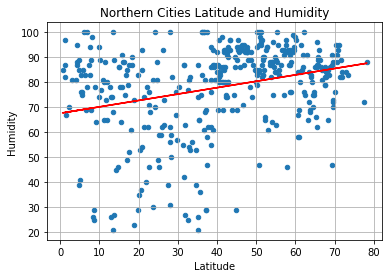

In [250]:
df_northern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]>=0,["Latitude","Humidity"]]

latitude=df_northern_hemisphere["Latitude"]
humidity=df_northern_hemisphere["Humidity"]

df_northern_hemisphere.plot.scatter(x="Latitude",y="Humidity",alpha=1,marker='o')
plt.title("Northern Cities Latitude and Humidity")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_northern_latitude_humidity.png')

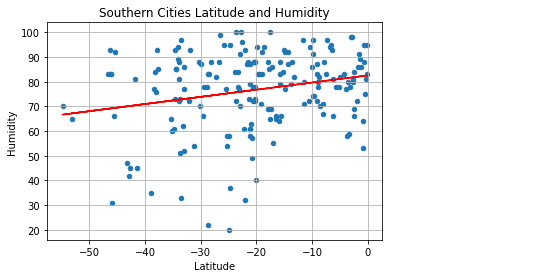

In [251]:
df_southern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]<0,["Latitude","Humidity"]]

latitude=df_southern_hemisphere["Latitude"]
humidity=df_southern_hemisphere["Humidity"]

df_southern_hemisphere.plot.scatter(x="Latitude",y="Humidity",alpha=1,marker='o')
plt.title("Southern Cities Latitude and Humidity")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_southern_latitude_humidity.png')

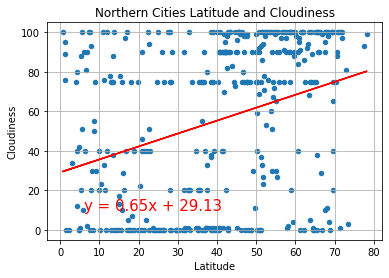

In [252]:
df_northern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]>=0,["Latitude","Cloudiness"]]

latitude=df_northern_hemisphere["Latitude"]
cloudiness=df_northern_hemisphere["Cloudiness"]

df_northern_hemisphere.plot.scatter(x="Latitude",y="Cloudiness",alpha=1,marker='o')
plt.title("Northern Cities Latitude and Cloudiness")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_northern_latitude_cloudiness.png')

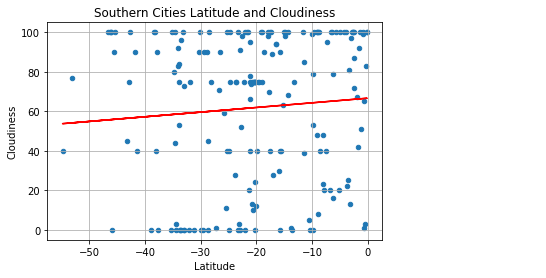

In [253]:
df_southern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]<0,["Latitude","Cloudiness"]]

latitude=df_southern_hemisphere["Latitude"]
cloudiness=df_southern_hemisphere["Cloudiness"]

df_southern_hemisphere.plot.scatter(x="Latitude",y="Cloudiness",alpha=1,marker='o')
plt.title("Southern Cities Latitude and Cloudiness")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.savefig('regression_southern_latitude_cloudiness.png')

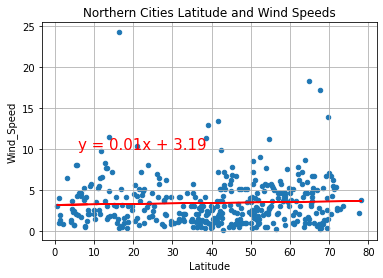

In [254]:
df_northern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]>=0,["Latitude","Wind_Speed"]]

latitude=df_northern_hemisphere["Latitude"]
wind_speed=df_northern_hemisphere["Wind_Speed"]

df_northern_hemisphere.plot.scatter(x="Latitude",y="Wind_Speed",alpha=1,marker='o')
plt.title("Northern Cities Latitude and Wind Speeds")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig('regression_northern_latitude_windspeed.png')

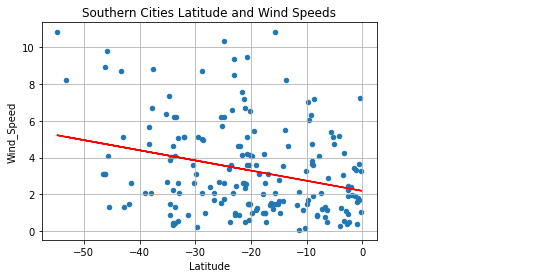

In [255]:
df_southern_hemisphere=curr_weather_df.loc[curr_weather_df["Latitude"]<=0,["Latitude","Wind_Speed"]]

latitude=df_southern_hemisphere["Latitude"]
wind_speed=df_southern_hemisphere["Wind_Speed"]

df_southern_hemisphere.plot.scatter(x="Latitude",y="Wind_Speed",alpha=1,marker='o')
plt.title("Southern Cities Latitude and Wind Speeds")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.savefig('regression_southern_latitude_windspeed.png')


In [ ]:
cty=city_names
city_names_list=[]
i=0

city_id=[]

weather_status=[]
weather_description=[]
lat=[]
lon=[]

while i < 501:
    r=random.randint(0,501)
    if cty[r] not in city_names_list:
        city_names_list.append(cty[r])
        i=len(city_names_list)
        
        url="http://api.openweathermap.org/data/2.5/weather?q={}&appid=54302faa5d1cebad17c99df3e66fa783".format(cty[r])
        resp=requests.get(url)
        data=resp.json()
      
        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lon"])
        city_id.append(data["id"])
        weather_status.append(data["weather"][0]["main"])
        weather_description.append(data["weather"][0]["description"])

In [231]:
selected_weather_df=pd.DataFrame({
        "Latitude":lat,
        "Longtitude":lon,
        "City_Number":city_id,
        "City_Name":city_names_list,
        "Weather_Status":weather_status,
        "Description":weather_description
        })
selected_weather_df

,Latitude,Longtitude,City_Number,City_Name,Weather_Status,Description
0,7.92,98.33,1153035,Kathu,Clouds,few clouds
1,4.75,-6.64,2282006,San-Pédro,Rain,light rain
2,-25.30,152.85,2146219,Hervey Bay,Clouds,scattered clouds
3,-8.10,156.84,2108857,Gizo Government Station,Rain,light rain
4,-33.59,26.89,964432,Port Alfred,Clouds,overcast clouds
...,...,...,...,...,...,...
496,-10.38,28.70,902721,Mwense,Rain,light rain
497,70.37,31.11,777019,Vardø,Snow,light snow
498,-9.80,-139.03,4020109,Atuona,Clear,clear sky
499,13.83,20.83,245785,Abéché,Clear,clear sky


In [232]:
curr_weather_df.to_csv("Output/500city.csv",encoding="utf-8",index=False,header=True)